#### Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Data Import

In [476]:
#import necessary modules to begin exploring the dataset
import pandas as pd
import numpy as np
import os
from glob import glob #returns a list of files matching a given pattern
import sqlite3
conn = sqlite3.connect('movies_db.sqlite')
cur = conn.cursor()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import a list of all files from the zipped folder
all_files = glob('./zippedData/*.csv.gz') 
all_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [3]:
type(all_files)

list

In [4]:
#create an empty dictionary to store the data
dict_files = {}

#for loop to populate the dictionary
for file in all_files:
    dict_files[file] = pd.read_csv(file)

In [5]:
dict_files.keys() 

dict_keys(['./zippedData\\bom.movie_gross.csv.gz', './zippedData\\imdb.name.basics.csv.gz', './zippedData\\imdb.title.akas.csv.gz', './zippedData\\imdb.title.basics.csv.gz', './zippedData\\imdb.title.crew.csv.gz', './zippedData\\imdb.title.principals.csv.gz', './zippedData\\imdb.title.ratings.csv.gz', './zippedData\\tmdb.movies.csv.gz', './zippedData\\tn.movie_budgets.csv.gz'])

In [6]:
#clean the file names to a common format
cleaned_files = {}
for filename in all_files:
    csv_cleaning = os.path.basename(filename).replace('.csv', '').replace('.', '_')
    filename_df = pd.read_csv(filename, index_col=0)
    cleaned_files[csv_cleaning] = filename_df

In [7]:
cleaned_files.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [8]:
conn = sqlite3.connect('movies_db.sqlite')

In [9]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [10]:
for name, table in cleaned_files.items():
    create_sql_table_from_df(table, name, conn)

could not make table bom_movie_gross_gz
Table 'bom_movie_gross_gz' already exists.
could not make table imdb_name_basics_gz
Table 'imdb_name_basics_gz' already exists.
could not make table imdb_title_akas_gz
Table 'imdb_title_akas_gz' already exists.
could not make table imdb_title_basics_gz
Table 'imdb_title_basics_gz' already exists.
could not make table imdb_title_crew_gz
Table 'imdb_title_crew_gz' already exists.
could not make table imdb_title_principals_gz
Table 'imdb_title_principals_gz' already exists.
could not make table imdb_title_ratings_gz
Table 'imdb_title_ratings_gz' already exists.
could not make table tmdb_movies_gz
Table 'tmdb_movies_gz' already exists.
could not make table tn_movie_budgets_gz
Table 'tn_movie_budgets_gz' already exists.


In [11]:
for item in cleaned_files.items():
    print('------------------')
    print(item[0])
    print(item[1].info())
    print('------------------')

------------------
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB
None
------------------
------------------
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None
------------------
------------------
imdb_title_akas_gz
<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (to

## QUESTION 1 - How much do the top 25 profitable movies compare pre and post inflation adjusted?

#### Clean and Explore df bom_movie_gross_gz

In [12]:
cur.execute("""SELECT * FROM bom_movie_gross_gz""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
# reassign null values with 0
cur.execute("""UPDATE bom_movie_gross_gz
                SET domestic_gross = 0
                WHERE domestic_gross IS null""")

In [15]:
#check to see if null values have been replaced with 0
cur.execute("""SELECT * FROM bom_movie_gross_gz WHERE domestic_gross IS null""").fetchall()

[]

In [16]:
# reassign null values with 0
cur.execute("""UPDATE bom_movie_gross_gz
                SET foreign_gross = 0
                WHERE foreign_gross IS null""")

In [17]:
#check to see if null values have been replaced with 0
cur.execute("""SELECT * FROM bom_movie_gross_gz WHERE foreign_gross IS null""").fetchall()

[]

In [18]:
cur.execute("""SELECT * FROM bom_movie_gross_gz
                """)

movie_gross_df = pd.DataFrame(cur.fetchall())
movie_gross_df.columns = [x[0] for x in cur.description]
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [19]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [20]:
#convert foreign_gross from object to float
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '').astype('float')

In [21]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [22]:
movie_gross_df['worldwide_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']

In [23]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


#### Import and update CPI module

In [24]:
!pip install cpi
import cpi

In [25]:
cpi.update()

In [26]:
movie_gross_df['worldwide_adjusted'] = movie_gross_df.apply(lambda x: 
                                        cpi.inflate(x.worldwide_gross, x.year), axis=1)

In [27]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,worldwide_adjusted
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1.250991e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,1.202335e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,1.125892e+09
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,9.711299e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,8.823764e+08
...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03,6.312343e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03,4.886975e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03,2.545299e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03,2.443487e+03


    -------This dataframe only contains movies between 2010-2018-------
    
    Move onto a dataframe with a more complete list of movies

### Movie Budgets Cleaning and Exploring

In [28]:
cur.execute("""SELECT * FROM tn_movie_budgets_gz""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [31]:
cur.execute("""SELECT * FROM tn_movie_budgets_gz""")

budgets_df = pd.DataFrame(cur.fetchall())
budgets_df.columns = [x[0] for x in cur.description]
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
# remove symbols and convert datatype to int for multiple columns
def int_conversion(df, col):
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('float')
    return df

In [33]:
convert_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in convert_cols:
    budgets_df = int_conversion(budgets_df, col)

budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


#### Break out release date by year

In [34]:
#view top ten highest grossing films pre cpi adjustment
budgets_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)

In [35]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09


In [36]:
budgets_df_test = budgets_df

In [37]:
budgets_df_test['release_date'] = pd.to_datetime(budgets_df['release_date'])
budgets_df_test.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09


In [38]:
budgets_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 4068
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 316.2+ KB


In [39]:
#extract release year from release_date
budgets_df_test['year'] = budgets_df_test['release_date'].dt.year

In [40]:
budgets_df_test.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015


In [41]:
budgets_df_test['gross_profit_loss'] = budgets_df_test['worldwide_gross'] - budgets_df_test['production_budget']
budgets_df_test.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,gross_profit_loss
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,1.433855e+09


#### Top 25 Producing Films pre Inflation Adjusted

In [190]:
budgets_df_test.sort_values(by='gross_profit_loss', ascending=False, inplace=True)

In [191]:
top_25_movies_pre_df = budgets_df_test[:25]

In [192]:
top_25_movies_pre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,gross_profit_loss
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,1.433855e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,2015,1.328723e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,1.292936e+09
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,2011,1.216693e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,1.148258e+09
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,2018,1.135773e+09


#### Plot top 25 Movies Pre Inflation Adjusted Graph

[Text(0, 0.5, 'Movie'), Text(0.5, 0, 'Profit (Billions)')]

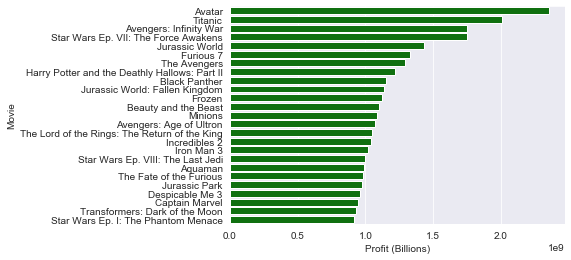

In [128]:
sns.set_style('darkgrid')
barplot = sns.barplot(x ='gross_profit_loss', y ='movie', data= top_25_profit_pre, color='green')
barplot.set(xlabel ='Profit (Billions)', ylabel ='Movie')

### Top 25 Movies Adjusted for Inflation

In [194]:
budget_2019 = budgets_df_test[budgets_df_test.year == 2019]

In [196]:
budget_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 95 to 2
Data columns (total 8 columns):
id                   67 non-null int64
release_date         67 non-null datetime64[ns]
movie                67 non-null object
production_budget    67 non-null float64
domestic_gross       67 non-null float64
worldwide_gross      67 non-null float64
year                 67 non-null int64
gross_profit_loss    67 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 4.7+ KB


In [210]:
budget_df_2018 = budgets_df_test.drop(budgets_df_test[(budgets_df_test.year == 2019) & 
                                                      (budgets_df_test.year == 2020)].index) #what is .index

In [217]:
budget_df_2018 = budget_df_2018[budget_df_2018.year != 2020]

In [218]:
budget_df_2018.year.unique()

array([2009, 1997, 2018, 2015, 2012, 2011, 2013, 2017, 2003, 1993, 2019,
       1999, 1994, 2014, 2016, 2010, 2004, 2001, 2006, 2002, 2008, 2007,
       1982, 1977, 2005, 1996, 1991, 1983, 1980, 1990, 1992, 1975, 2000,
       1989, 1998, 1973, 1988, 1939, 1978, 1985, 1981, 1986, 1995, 1987,
       1984, 1965, 1942, 1972, 1950, 1976, 1979, 1937, 1974, 1964, 1971,
       1967, 1969, 1953, 1940, 1970, 1956, 1968, 1963, 1959, 1962, 1960,
       1961, 1952, 1957, 1966, 1954, 1946, 1951, 1925, 1958, 1915, 1945,
       1943, 1933, 1916, 1949, 1948, 1947, 1955, 1929, 1936, 1920, 1935,
       1938, 1934, 1944, 1931, 1941, 1927, 1930], dtype=int64)

In [221]:
budget_df_2018['worldwide_adjusted'] = budget_df_2018.apply(lambda x: 
                                        cpi.inflate(x.gross_profit_loss, x.year), axis=1)

E:\Anaconda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [222]:
budget_df_2018

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,gross_profit_loss,worldwide_adjusted
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,2.802024e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,3.198832e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,1.779810e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,1.884727e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,1.433855e+09,1.546619e+09
...,...,...,...,...,...,...,...,...,...
404,5,2002-08-16,The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,2002,-9.290500e+07,-1.320279e+08
352,53,2001-04-27,Town & Country,105000000.0,6712451.0,1.036477e+07,2001,-9.463523e+07,-1.366130e+08
341,42,2019-06-14,Men in Black: International,110000000.0,3100000.0,3.100000e+06,2019,-1.069000e+08,-1.069000e+08
193,94,2011-03-11,Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,2011,-1.104502e+08,-1.255335e+08


In [224]:
budgets_adjusted = budget_df_2018.append(budget_2019)

E:\Anaconda\envs\learn-env\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [311]:
budgets_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 4567 to 2
Data columns (total 9 columns):
domestic_gross        5846 non-null float64
gross_profit_loss     5846 non-null float64
id                    5846 non-null int64
movie                 5846 non-null object
production_budget     5846 non-null float64
release_date          5846 non-null datetime64[ns]
worldwide_adjusted    5779 non-null float64
worldwide_gross       5846 non-null float64
year                  5846 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 616.7+ KB


In [432]:
budgets_adjusted.sort_values(by='worldwide_adjusted', ascending=False, inplace=True)

In [433]:
budgets_adjusted.head(25)

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939,99.134665
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977,70.508910
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042
0,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577
4775,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591
3341,230347346.0,4.162145e+08,42,The Exorcist,12000000.0,1973-12-26,2.396580e+09,4.282145e+08,1973,34.684540
3859,163214286.0,2.780143e+08,60,The Sound of Music,8200000.0,1965-03-02,2.256390e+09,2.862143e+08,1965,33.904181
3340,260000000.0,4.587000e+08,41,Jaws,12000000.0,1975-06-20,2.179737e+09,4.707000e+08,1975,38.225000


In [435]:
top_25_movies_adjusted = budgets_adjusted[:25]

#### Inflation Adjusted Graph

[Text(0, 0.5, 'Movie'), Text(0.5, 0, 'Profit (Billions)')]

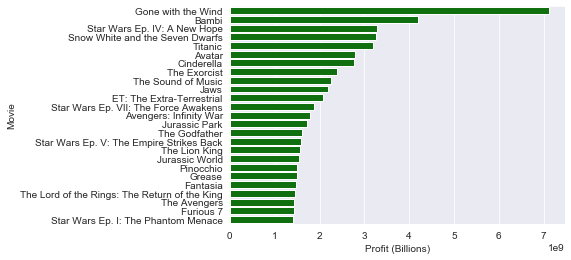

In [234]:
sns.set_style('darkgrid')
barplot = sns.barplot(x ='worldwide_adjusted', y ='movie', data= top_25_movies_adjusted, color='green')
barplot.set(xlabel ='Profit (Billions)', ylabel ='Movie')

### Question 1 Conclusion and Recommendations 

There's a clear difference between the top 25 films when accounting for inflation. The number one most profitable film of all time is "Gone with the Wind" at over seven billion dollars. Avatar, the number one film without adjusting profits for inflation drops down to sixth overall. 

When exploring the profitability in any capacity, it's highly recommended to adjust the financial information for inflation, which wiill provide much more accurate conclusions to historical movie data exploration.







### Top Movies ROI

In [429]:
budgets_adjusted['ROI'] = (budgets_adjusted['worldwide_gross'] - 
                           budgets_adjusted['production_budget']) / budgets_adjusted['production_budget']

In [431]:
budgets_adjusted.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939,99.134665
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977,70.508910
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042


[Text(0, 0.5, 'Inflation Adjusted Profit ($T)'), Text(0.5, 0, '% ROI')]

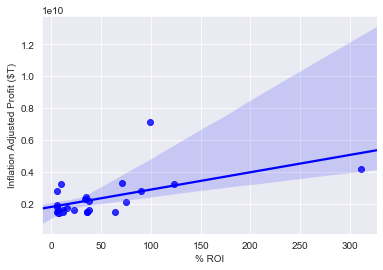

In [442]:
sns.set_style('darkgrid')
regplot = sns.regplot(x='ROI', y='worldwide_adjusted',
                      data=top_25_movies_adjusted, color='blue')
regplot.set(xlabel = '% ROI', ylabel = 'Inflation Adjusted Profit ($T)')

In [439]:
top_25_movies_adjusted['ROI'].describe()

count     25.000000
mean      46.502281
std       64.448250
min        5.532577
25%        7.930823
50%       33.904181
75%       63.585030
max      311.354312
Name: ROI, dtype: float64

## for imdb_title_basics_gz

In [43]:
cur.execute("""SELECT * FROM imdb_title_basics_gz""")

genres_df = pd.DataFrame(cur.fetchall())
genres_df.columns = [x[0] for x in cur.description]
genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [263]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 33 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
year               146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
Western            146144 non-null float64
Drama              146144 non-null float64
Comedy             146144 non-null float64
News               146144 non-null float64
Action             146144 non-null float64
Family             146144 non-null float64
Talk-Show          146144 non-null float64
Romance            146144 non-null float64
Game-Show          146144 non-null float64
Fantasy            146144 non-null float64
Horror             146144 non-null float64
Animation          146144 non-null float64
Biography          146144 non-null float64
Thriller           146144 non-null float64
Documentary        146144 non-null 

In [44]:
#rename year column
genres_df.rename(columns ={'start_year': 'year'}, inplace=True)

In [46]:
genres_df.head()

,tconst,primary_title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [264]:
#splitting genres from genre column
genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split(',') if x else x)
genres_df.head()

AttributeError: 'list' object has no attribute 'split'

In [51]:
all_genres = set()
for genres in genres_df['genres']:
    if genres:
        all_genres.update(genres)

In [53]:
all_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [54]:
for genres in all_genres:
    genres_df[genres] = np.zeros(shape=genres_df.shape[0])
    
genres_df.head()

,tconst,primary_title,original_title,year,runtime_minutes,genres,Western,Drama,Comedy,News,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
for index, row in genres_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            genres_df.loc[index, genre] = 1
            
genres_df.head()

,tconst,primary_title,original_title,year,runtime_minutes,genres,Western,Drama,Comedy,News,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
genres_df_final = genres_df.drop(columns = 'genres')

In [57]:
genres_df_final.head()

,tconst,primary_title,original_title,year,runtime_minutes,Western,Drama,Comedy,News,Action,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [469]:
for col in genres_df_final

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [266]:
genres_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 32 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
year               146144 non-null int64
runtime_minutes    114405 non-null float64
Western            146144 non-null float64
Drama              146144 non-null float64
Comedy             146144 non-null float64
News               146144 non-null float64
Action             146144 non-null float64
Family             146144 non-null float64
Talk-Show          146144 non-null float64
Romance            146144 non-null float64
Game-Show          146144 non-null float64
Fantasy            146144 non-null float64
Horror             146144 non-null float64
Animation          146144 non-null float64
Biography          146144 non-null float64
Thriller           146144 non-null float64
Documentary        146144 non-null float64
Musical            146144 non-null

### join genres and profit dfs --MAYBE DELETE WHOLE SECTION

In [542]:
movie_genres_profit_df = pd.merge(budgets_df_test, genres_df_final, 
                                 left_on = ['movie'], right_on = ['primary_title'],
                                 how = 'left')

In [543]:
movie_genres_profit_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,gross_profit_loss,tconst,primary_title,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,tt1775309,Avatar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt2495766,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt8852130,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,Avengers: Infinity War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
movie_genres_profit_df.shape

(7221, 40)

In [538]:
movie_genres_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 40 columns):
id                   3815 non-null int64
release_date         3815 non-null datetime64[ns]
movie                3815 non-null object
production_budget    3815 non-null float64
domestic_gross       3815 non-null float64
worldwide_gross      3815 non-null float64
year_x               3815 non-null int64
gross_profit_loss    3815 non-null float64
tconst               3815 non-null object
primary_title        3815 non-null object
original_title       3814 non-null object
year_y               3815 non-null int64
runtime_minutes      3328 non-null float64
Western              3815 non-null float64
Drama                3815 non-null float64
Comedy               3815 non-null float64
News                 3815 non-null float64
Action               3815 non-null float64
Family               3815 non-null float64
Talk-Show            3815 non-null float64
Romance              3815 non-null f

In [544]:
movie_genres_profit_df.sort_values(by='gross_profit_loss', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,gross_profit_loss,tconst,primary_title,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,tt1775309,Avatar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt8852130,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt2495766,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,Avengers: Infinity War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
#Drop duplicate rows from df merge
top_movies_cleaned = movie_genres_profit_df.drop_duplicates()

In [546]:
top_movies_cleaned.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,gross_profit_loss,tconst,primary_title,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,tt1775309,Avatar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt2495766,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt8852130,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,Avengers: Infinity War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Top Movies Cleaned

In [547]:
top_movies_cleaned.sort_values(by='gross_profit_loss', ascending=False, inplace=True)
top_movies_cleaned.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,gross_profit_loss,tconst,primary_title,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,tt1775309,Avatar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt8852130,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt2495766,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,Avengers: Infinity War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,1.433855e+09,tt0369610,Jurassic World,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,2015,1.328723e+09,tt2820852,Furious 7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,1.292936e+09,tt0848228,The Avengers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,2011,1.216693e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,1.148258e+09,tt1825683,Black Panther,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [550]:
top_movies_cleaned.drop_duplicates(inplace=True)

In [551]:
top_movies_cleaned.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,gross_profit_loss,tconst,primary_title,...,War,Reality-TV,Crime,Sport,History,Short,Adult,Sci-Fi,Music,Mystery
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,tt1775309,Avatar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt8852130,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,tt2495766,Titanic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,tt4154756,Avengers: Infinity War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Who are the top 5 Most Profitable Directors?

#### Explore and clean df

In [143]:
cur.execute("""SELECT * FROM imdb_title_crew_gz
            """)

directors_df = pd.DataFrame(cur.fetchall())
directors_df.columns = [x[0] for x in cur.description]
directors_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [145]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [148]:
cur.execute("""SELECT * FROM imdb_name_basics_gz
            """)

names_df = pd.DataFrame(cur.fetchall())
names_df.columns = [x[0] for x in cur.description]
names_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [146]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


#### Join Directors and Names df's

In [149]:
#join dfs on directors
directors_names_df = pd.merge(directors_df, names_df, 
                                 left_on = ['directors'], right_on = ['nconst'],
                                 how = 'left')

In [152]:
directors_names_df.isna().sum()

tconst                     0
directors               5727
writers                35883
nconst                 21455
primary_name           21455
birth_year            117921
death_year            145367
primary_profession     21929
known_for_titles       24941
dtype: int64

In [153]:
#drop duplicate entries
directors_names_df = directors_names_df.drop_duplicates()

In [154]:
directors_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 9 columns):
tconst                146144 non-null object
directors             140417 non-null object
writers               110261 non-null object
nconst                124689 non-null object
primary_name          124689 non-null object
birth_year            28223 non-null float64
death_year            777 non-null float64
primary_profession    124215 non-null object
known_for_titles      121203 non-null object
dtypes: float64(2), object(7)
memory usage: 11.1+ MB


In [155]:
#drop column
directors_names_df = directors_names_df.drop('birth_year', axis=1)

In [156]:
#drop column
directors_names_df = directors_names_df.drop('death_year', axis=1)

In [157]:
directors_names_df.head()

,tconst,directors,writers,nconst,primary_name,primary_profession,known_for_titles
0,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774"
1,tt0438973,None,"nm0175726,nm1802864",NaN,NaN,NaN,NaN
2,tt0462036,nm1940585,nm1940585,nm1940585,Bill Haley,"director,writer,producer","tt0462036,tt6740510"
3,tt0835418,nm0151540,"nm0310087,nm0841532",nm0151540,Jay Chandrasekhar,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,NaN,NaN,NaN,NaN


In [158]:
#drop NaN values
directors_names_df = directors_names_df[pd.notnull(directors_names_df['primary_name'])]

In [159]:
directors_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124689 entries, 0 to 146142
Data columns (total 7 columns):
tconst                124689 non-null object
directors             124689 non-null object
writers               97304 non-null object
nconst                124689 non-null object
primary_name          124689 non-null object
primary_profession    124215 non-null object
known_for_titles      121203 non-null object
dtypes: object(7)
memory usage: 7.6+ MB


In [160]:
#drop NaN values
directors_names_df = directors_names_df[pd.notnull(directors_names_df['directors'])]

In [161]:
directors_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124689 entries, 0 to 146142
Data columns (total 7 columns):
tconst                124689 non-null object
directors             124689 non-null object
writers               97304 non-null object
nconst                124689 non-null object
primary_name          124689 non-null object
primary_profession    124215 non-null object
known_for_titles      121203 non-null object
dtypes: object(7)
memory usage: 7.6+ MB


In [162]:
directors_names_df.head()

,tconst,directors,writers,nconst,primary_name,primary_profession,known_for_titles
0,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774"
2,tt0462036,nm1940585,nm1940585,nm1940585,Bill Haley,"director,writer,producer","tt0462036,tt6740510"
3,tt0835418,nm0151540,"nm0310087,nm0841532",nm0151540,Jay Chandrasekhar,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745"
5,tt0879859,nm2416460,None,nm2416460,Eric Manchester,"director,writer","tt0879861,tt0879859"
6,tt0996958,nm2286991,"nm2286991,nm2651190",nm2286991,Tara Cardinal,"actress,writer,producer","tt0430357,tt0996958,tt2234024,tt6005182"


In [163]:
#split the column entries up by comma
directors_names_df['primary_profession'] = directors_names_df['primary_profession'].apply(lambda x: x.split(',') if x else x)

In [164]:
directors_names_df

,tconst,directors,writers,nconst,primary_name,primary_profession,known_for_titles
0,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,"[producer, director, writer]","tt0285252,tt0106489,tt0119465,tt0359774"
2,tt0462036,nm1940585,nm1940585,nm1940585,Bill Haley,"[director, writer, producer]","tt0462036,tt6740510"
3,tt0835418,nm0151540,"nm0310087,nm0841532",nm0151540,Jay Chandrasekhar,"[director, actor, writer]","tt0144557,tt0486551,tt0331953,tt0247745"
5,tt0879859,nm2416460,None,nm2416460,Eric Manchester,"[director, writer]","tt0879861,tt0879859"
6,tt0996958,nm2286991,"nm2286991,nm2651190",nm2286991,Tara Cardinal,"[actress, writer, producer]","tt0430357,tt0996958,tt2234024,tt6005182"
...,...,...,...,...,...,...,...
146137,tt8998302,nm10121510,nm10121510,nm10121510,Daryl Boman,"[producer, director, writer]",None
146138,tt8999892,nm10122247,"nm10122247,nm10122246",nm10122247,C. Damon Adcock,None,None
146139,tt8999974,nm10122357,nm10122357,nm10122357,Daysi Burbano,"[director, writer, cinematographer]",None
146140,tt9001390,nm6711477,nm6711477,nm6711477,Bernard Lessa,"[director, writer, cinematographer]","tt3966444,tt6860362,tt4020976"


In [165]:
#split the column entries up by comma
directors_names_df['known_for_titles'] = directors_names_df['known_for_titles'].apply(lambda x: x.split(',') if x else x)

In [167]:
directors_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124689 entries, 0 to 146142
Data columns (total 7 columns):
tconst                124689 non-null object
directors             124689 non-null object
writers               97304 non-null object
nconst                124689 non-null object
primary_name          124689 non-null object
primary_profession    124215 non-null object
known_for_titles      121203 non-null object
dtypes: object(7)
memory usage: 7.6+ MB


In [169]:
#drop Nan entries
directors_names_df = directors_names_df[pd.notnull(directors_names_df['known_for_titles'])]

In [170]:
directors_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121203 entries, 0 to 146142
Data columns (total 7 columns):
tconst                121203 non-null object
directors             121203 non-null object
writers               95472 non-null object
nconst                121203 non-null object
primary_name          121203 non-null object
primary_profession    121134 non-null object
known_for_titles      121203 non-null object
dtypes: object(7)
memory usage: 7.4+ MB


In [171]:
#drop column
directors_names_df = directors_names_df.drop('writers', axis=1)

In [172]:
directors_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121203 entries, 0 to 146142
Data columns (total 6 columns):
tconst                121203 non-null object
directors             121203 non-null object
nconst                121203 non-null object
primary_name          121203 non-null object
primary_profession    121134 non-null object
known_for_titles      121203 non-null object
dtypes: object(6)
memory usage: 6.5+ MB


In [173]:
directors_names_df = directors_names_df.dropna()

In [174]:
directors_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121134 entries, 0 to 146142
Data columns (total 6 columns):
tconst                121134 non-null object
directors             121134 non-null object
nconst                121134 non-null object
primary_name          121134 non-null object
primary_profession    121134 non-null object
known_for_titles      121134 non-null object
dtypes: object(6)
memory usage: 6.5+ MB


In [177]:
directors_names_df.head()

,tconst,directors,nconst,primary_name,primary_profession,known_for_titles
0,tt0285252,nm0899854,nm0899854,Tony Vitale,"[producer, director, writer]","[tt0285252, tt0106489, tt0119465, tt0359774]"
2,tt0462036,nm1940585,nm1940585,Bill Haley,"[director, writer, producer]","[tt0462036, tt6740510]"
3,tt0835418,nm0151540,nm0151540,Jay Chandrasekhar,"[director, actor, writer]","[tt0144557, tt0486551, tt0331953, tt0247745]"
5,tt0879859,nm2416460,nm2416460,Eric Manchester,"[director, writer]","[tt0879861, tt0879859]"
6,tt0996958,nm2286991,nm2286991,Tara Cardinal,"[actress, writer, producer]","[tt0430357, tt0996958, tt2234024, tt6005182]"


In [178]:
directors_names_df = directors_names_df.drop('nconst', axis=1)

In [179]:
directors_names_df.head()

,tconst,directors,primary_name,primary_profession,known_for_titles
0,tt0285252,nm0899854,Tony Vitale,"[producer, director, writer]","[tt0285252, tt0106489, tt0119465, tt0359774]"
2,tt0462036,nm1940585,Bill Haley,"[director, writer, producer]","[tt0462036, tt6740510]"
3,tt0835418,nm0151540,Jay Chandrasekhar,"[director, actor, writer]","[tt0144557, tt0486551, tt0331953, tt0247745]"
5,tt0879859,nm2416460,Eric Manchester,"[director, writer]","[tt0879861, tt0879859]"
6,tt0996958,nm2286991,Tara Cardinal,"[actress, writer, producer]","[tt0430357, tt0996958, tt2234024, tt6005182]"


In [242]:
test = directors_names_df

In [243]:
all_professions = set()
for profession in test['primary_profession']:
    if profession:
        all_professions.update(profession)

In [244]:
all_professions

{'actor',
 'actress',
 'animation_department',
 'art_department',
 'art_director',
 'assistant',
 'assistant_director',
 'camera_department',
 'casting_department',
 'casting_director',
 'cinematographer',
 'composer',
 'costume_department',
 'costume_designer',
 'director',
 'editor',
 'editorial_department',
 'executive',
 'legal',
 'location_management',
 'make_up_department',
 'manager',
 'miscellaneous',
 'music_department',
 'producer',
 'production_designer',
 'production_manager',
 'publicist',
 'set_decorator',
 'sound_department',
 'soundtrack',
 'special_effects',
 'stunts',
 'talent_agent',
 'transportation_department',
 'visual_effects',
 'writer'}

In [245]:
for profession in all_professions:
    test[profession] = np.zeros(shape=test.shape[0])
                                
test.head()

,tconst,directors,primary_name,primary_profession,known_for_titles,editorial_department,visual_effects,composer,assistant,soundtrack,...,casting_director,make_up_department,actor,art_director,manager,writer,production_designer,cinematographer,miscellaneous,Documentary
0,tt0285252,nm0899854,Tony Vitale,"[producer, director, writer]","[tt0285252, tt0106489, tt0119465, tt0359774]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,tt0462036,nm1940585,Bill Haley,"[director, writer, producer]","[tt0462036, tt6740510]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,tt0835418,nm0151540,Jay Chandrasekhar,"[director, actor, writer]","[tt0144557, tt0486551, tt0331953, tt0247745]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,tt0879859,nm2416460,Eric Manchester,"[director, writer]","[tt0879861, tt0879859]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,tt0996958,nm2286991,Tara Cardinal,"[actress, writer, producer]","[tt0430357, tt0996958, tt2234024, tt6005182]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [254]:
for index, row, in test.iterrows():
    if row['primary_profession']:
        for profession in row['primary_profession']:
            test.loc[index, profession] = 1

test.head()

KeyboardInterrupt: 

In [255]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 146142
Data columns (total 43 columns):
tconst                       111941 non-null object
directors                    111941 non-null object
primary_name                 111941 non-null object
primary_profession           111941 non-null object
known_for_titles             111941 non-null object
editorial_department         111941 non-null float64
visual_effects               111941 non-null float64
composer                     111941 non-null float64
assistant                    111941 non-null float64
soundtrack                   111941 non-null float64
actress                      111941 non-null float64
camera_department            111941 non-null float64
location_management          111941 non-null float64
special_effects              111941 non-null float64
transportation_department    111941 non-null float64
director                     111941 non-null float64
casting_department           111941 non-null f

In [247]:
test = test[test.director == 1]

In [257]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 146142
Data columns (total 43 columns):
tconst                       111941 non-null object
directors                    111941 non-null object
primary_name                 111941 non-null object
primary_profession           111941 non-null object
known_for_titles             111941 non-null object
editorial_department         111941 non-null float64
visual_effects               111941 non-null float64
composer                     111941 non-null float64
assistant                    111941 non-null float64
soundtrack                   111941 non-null float64
actress                      111941 non-null float64
camera_department            111941 non-null float64
location_management          111941 non-null float64
special_effects              111941 non-null float64
transportation_department    111941 non-null float64
director                     111941 non-null float64
casting_department           111941 non-null f

#### Join Directors, Names, and Ratings db's

In [251]:
cur.execute("""SELECT * FROM imdb_title_ratings_gz""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [259]:
directors_ratings_df = pd.merge(df, test, 
                                 left_on = ['tconst'], right_on = ['tconst'],
                                 how = 'right')

In [260]:
directors_ratings_df.head()

,tconst,averagerating,numvotes,directors,primary_name,primary_profession,known_for_titles,editorial_department,visual_effects,composer,...,casting_director,make_up_department,actor,art_director,manager,writer,production_designer,cinematographer,miscellaneous,Documentary
0,tt10356526,8.3,31.0,nm8353804,Sukh Sanghera,"[director, cinematographer, location_management]","[tt10356526, tt8749962, tt9579874, tt5231224]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,tt1042974,6.4,20.0,nm1915232,Marcel Grant,"[director, writer, producer]","[tt1042974, tt1538868, tt0949872, tt0458519]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,tt1043726,4.2,50352.0,nm0001317,Renny Harlin,"[producer, director, writer]","[tt2238032, tt0149261, tt0099423, tt0106582]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,tt1060240,6.5,21.0,nm1926349,Carlos M. Barros,"[director, writer, casting_director]","[tt1612376, tt1823187, tt0460544, tt1060240]",0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,tt1069246,6.2,326.0,nm0868643,Fina Torres,"[writer, director, producer]","[tt0089739, tt0107537, tt2325833, tt1069246]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [288]:
directors_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 111940
Data columns (total 45 columns):
tconst                       111941 non-null object
averagerating                59562 non-null float64
numvotes                     59562 non-null float64
directors                    111941 non-null object
primary_name                 111941 non-null object
primary_profession           111941 non-null object
known_for_titles             111941 non-null object
editorial_department         111941 non-null float64
visual_effects               111941 non-null float64
composer                     111941 non-null float64
assistant                    111941 non-null float64
soundtrack                   111941 non-null float64
actress                      111941 non-null float64
camera_department            111941 non-null float64
location_management          111941 non-null float64
special_effects              111941 non-null float64
transportation_department    111941 non-null flo

In [267]:
genres_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 32 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
year               146144 non-null int64
runtime_minutes    114405 non-null float64
Western            146144 non-null float64
Drama              146144 non-null float64
Comedy             146144 non-null float64
News               146144 non-null float64
Action             146144 non-null float64
Family             146144 non-null float64
Talk-Show          146144 non-null float64
Romance            146144 non-null float64
Game-Show          146144 non-null float64
Fantasy            146144 non-null float64
Horror             146144 non-null float64
Animation          146144 non-null float64
Biography          146144 non-null float64
Thriller           146144 non-null float64
Documentary        146144 non-null float64
Musical            146144 non-null

#### Merge Directors, Names, Ratings, Genres

In [300]:
movie_data_df = pd.merge(genres_df_final, directors_ratings_df, 
                                 left_on = ['tconst'], right_on = ['tconst'],
                                 how = 'right')

In [302]:
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 111940
Data columns (total 76 columns):
tconst                       111941 non-null object
primary_title                111941 non-null object
original_title               111940 non-null object
year                         111941 non-null int64
runtime_minutes              89340 non-null float64
Western                      111941 non-null float64
Drama                        111941 non-null float64
Comedy                       111941 non-null float64
News                         111941 non-null float64
Action                       111941 non-null float64
Family                       111941 non-null float64
Talk-Show                    111941 non-null float64
Romance                      111941 non-null float64
Game-Show                    111941 non-null float64
Fantasy                      111941 non-null float64
Horror                       111941 non-null float64
Animation                    111941 non-null fl

##### Drop unwanted columns

In [304]:
#Drop unwanted professions
movie_data_df_drop_one = movie_data_df.drop(
                            movie_data_df.loc[:, 'casting_department' : 
                                             'Documentary_y'].columns, axis=1)
movie_data_df_drop_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 111940
Data columns (total 49 columns):
tconst                       111941 non-null object
primary_title                111941 non-null object
original_title               111940 non-null object
year                         111941 non-null int64
runtime_minutes              89340 non-null float64
Western                      111941 non-null float64
Drama                        111941 non-null float64
Comedy                       111941 non-null float64
News                         111941 non-null float64
Action                       111941 non-null float64
Family                       111941 non-null float64
Talk-Show                    111941 non-null float64
Romance                      111941 non-null float64
Game-Show                    111941 non-null float64
Fantasy                      111941 non-null float64
Horror                       111941 non-null float64
Animation                    111941 non-null fl

In [305]:
#Drop unwanted professions
movie_data_df_drop_two = movie_data_df_drop_one.drop(
                            movie_data_df_drop_one.loc[:, 'editorial_department' : 
                                             'transportation_department'].columns, axis=1)

In [306]:
movie_data_df_drop_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 111940
Data columns (total 39 columns):
tconst                111941 non-null object
primary_title         111941 non-null object
original_title        111940 non-null object
year                  111941 non-null int64
runtime_minutes       89340 non-null float64
Western               111941 non-null float64
Drama                 111941 non-null float64
Comedy                111941 non-null float64
News                  111941 non-null float64
Action                111941 non-null float64
Family                111941 non-null float64
Talk-Show             111941 non-null float64
Romance               111941 non-null float64
Game-Show             111941 non-null float64
Fantasy               111941 non-null float64
Horror                111941 non-null float64
Animation             111941 non-null float64
Biography             111941 non-null float64
Thriller              111941 non-null float64
Documentary_x        

In [307]:
#Drop Genres Columns
movie_data_df_drop_three = movie_data_df_drop_two.drop(
                            movie_data_df_drop_two.loc[:, 'Western' :
                                                      'Mystery'].columns, axis=1)

In [310]:
movie_data_df_drop_three.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 111940
Data columns (total 12 columns):
tconst                111941 non-null object
primary_title         111941 non-null object
original_title        111940 non-null object
year                  111941 non-null int64
runtime_minutes       89340 non-null float64
averagerating         59562 non-null float64
numvotes              59562 non-null float64
directors             111941 non-null object
primary_name          111941 non-null object
primary_profession    111941 non-null object
known_for_titles      111941 non-null object
director              111941 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 11.1+ MB


In [312]:
movie_data_final_df = movie_data_df_drop_three

In [408]:
movie_data_final_df.head()

,tconst,primary_title,original_title,year,runtime_minutes,averagerating,numvotes,directors,primary_name,primary_profession,known_for_titles,director
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77.0,nm0712540,Harnam Singh Rawail,"[director, writer, producer]","[tt0266757, tt0266712, tt0134996, tt0266765]",1.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43.0,nm0002411,Mani Kaul,"[director, writer, actor]","[tt0102515, tt0070009, tt0066514, tt0207626]",1.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517.0,nm0000080,Orson Welles,"[actor, director, writer]","[tt0048393, tt0052311, tt0057427, tt0033467]",1.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13.0,nm0611531,Hrishikesh Mukherjee,"[director, editor, writer]","[tt0066763, tt0147855, tt0137362, tt0137361]",1.0
4,tt0112502,Bigfoot,Bigfoot,2017,NaN,4.1,32.0,nm6883878,Mc Jones,"[actor, director]","[tt0112502, tt3904078, tt3010520]",1.0


In [409]:
top_200_rating = movie_data_final_df[:200]

In [410]:
top_200_rating.sort_values(by='averagerating', ascending=False, inplace=True)

E:\Anaconda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [416]:
top_200_rating.head(10)

,tconst,primary_title,original_title,year,runtime_minutes,averagerating,numvotes,directors,primary_name,primary_profession,known_for_titles,director
13,tt0230212,The Final Journey,The Final Journey,2010,120.0,8.8,8.0,nm0011276,R.J. Adams,"[actor, writer, director]","[tt2133209, tt3821912, tt2330765, tt0460686]",1.0
142,tt0473088,Stan,Stan,2011,NaN,8.8,27.0,nm1464075,Evald Johnson,"[editor, editorial_department, director]","[tt0358770, tt0473088, tt1530849, tt2258058]",1.0
94,tt0446792,Surviving in L.A.,Surviving in L.A.,2019,NaN,8.7,12.0,nm3584411,Abbi Lake O'Neill,"[actress, writer, director]","[tt6823010, tt1218337, tt0446792]",1.0
57,tt0406282,Bubbles,Bubbles,2011,80.0,8.6,18.0,nm1589698,Kasper Syhler,"[writer, producer, director]","[tt1039951, tt0406282, tt0461294]",1.0
117,tt0460809,The Grasslands,The Grasslands,2011,114.0,8.6,17.0,nm0706210,Chris Raffaele,"[actor, director, writer]","[tt4785536, tt0460809, tt0472556, tt5546566]",1.0
115,tt0460528,One Step Beyond: The True Story of Géraldine F...,One Step Beyond,2012,56.0,8.5,26.0,nm5405113,Sèbastien Montaz-Rosset,"[director, camera_department, writer]","[tt3658642, tt5512430, tt2625054, tt3546764]",1.0
119,tt0460957,Texxas Jam '78,Texxas Jam '78,2012,60.0,8.5,8.0,nm1943600,James Austin,"[director, writer]",[tt0460957],1.0
31,tt0328810,My Land,Aamaar Bhuvan,2018,102.0,7.9,61.0,nm0784019,Mrinal Sen,"[director, writer, producer]","[tt0084198, tt0080341, tt0070498, tt0071317]",1.0
107,tt0454876,Life of Pi,Life of Pi,2012,127.0,7.9,535836.0,nm0000487,Ang Lee,"[director, producer, writer]","[tt0454876, tt0808357, tt0190332, tt0388795]",1.0
18,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,7.8,22.0,nm0024093,Vasil Amashukeli,"[director, cinematographer, miscellaneous]","[tt0262719, tt0262218, tt0262637, tt0262431]",1.0


In [412]:
directors_rating_grouped = top_200_rating.groupby(['primary_name'])['averagerating'].mean()

In [413]:
directors_rating_grouped.head()

primary_name
A.D. Liano           6.5
Abbi Lake O'Neill    8.7
Alan Swyer           NaN
Alejandro Chomski    6.4
Alex Garland         7.7
Name: averagerating, dtype: float64

In [415]:
directors_rating_grouped.sort_values(ascending=False, inplace=True)
directors_rating_grouped.head(10)

primary_name
R.J. Adams                 8.8
Evald Johnson              8.8
Abbi Lake O'Neill          8.7
Chris Raffaele             8.6
Kasper Syhler              8.6
James Austin               8.5
Sèbastien Montaz-Rosset    8.5
Mrinal Sen                 7.9
Ang Lee                    7.9
Carsten Brandt             7.8
Name: averagerating, dtype: float64

## QUESTION 2 - Is there any correlation between rating and profitability?

### Merge Financial and Movie data

In [443]:
budgets_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 4567 to 2
Data columns (total 10 columns):
domestic_gross        5846 non-null float64
gross_profit_loss     5846 non-null float64
id                    5846 non-null int64
movie                 5846 non-null object
production_budget     5846 non-null float64
release_date          5846 non-null datetime64[ns]
worldwide_adjusted    5779 non-null float64
worldwide_gross       5846 non-null float64
year                  5846 non-null int64
ROI                   5846 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 502.4+ KB


In [444]:
budgets_adjusted.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year,ROI
4567,198680470.0,3.866252e+08,68,Gone with the Wind,3900000.0,1939-12-15,7.111039e+09,3.905252e+08,1939,99.134665
5346,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312
3464,460998007.0,7.755980e+08,65,Star Wars Ep. IV: A New Hope,11000000.0,1977-05-25,3.272064e+09,7.865980e+08,1977,70.508910
5117,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880
42,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042


In [445]:
movie_data_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111941 entries, 0 to 111940
Data columns (total 12 columns):
tconst                111941 non-null object
primary_title         111941 non-null object
original_title        111940 non-null object
year                  111941 non-null int64
runtime_minutes       89340 non-null float64
averagerating         59562 non-null float64
numvotes              59562 non-null float64
directors             111941 non-null object
primary_name          111941 non-null object
primary_profession    111941 non-null object
known_for_titles      111941 non-null object
director              111941 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 11.1+ MB


In [446]:
movie_data_final_df.head(20)

,tconst,primary_title,original_title,year,runtime_minutes,averagerating,numvotes,directors,primary_name,primary_profession,known_for_titles,director
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77.0,nm0712540,Harnam Singh Rawail,"[director, writer, producer]","[tt0266757, tt0266712, tt0134996, tt0266765]",1.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43.0,nm0002411,Mani Kaul,"[director, writer, actor]","[tt0102515, tt0070009, tt0066514, tt0207626]",1.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517.0,nm0000080,Orson Welles,"[actor, director, writer]","[tt0048393, tt0052311, tt0057427, tt0033467]",1.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13.0,nm0611531,Hrishikesh Mukherjee,"[director, editor, writer]","[tt0066763, tt0147855, tt0137362, tt0137361]",1.0
4,tt0112502,Bigfoot,Bigfoot,2017,NaN,4.1,32.0,nm6883878,Mc Jones,"[actor, director]","[tt0112502, tt3904078, tt3010520]",1.0
5,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,NaN,NaN,nm0309428,Louis van Gasteren,"[director, writer, producer]","[tt0460538, tt8157978, tt0085644, tt0185977]",1.0
6,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,6.8,451.0,nm1030585,Ágnes Kocsis,"[director, writer, producer]","[tt0146592, tt0291503, tt0461424, tt0484487]",1.0
7,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,4.6,64.0,nm0417352,Miklós Jancsó,"[director, writer, actor]","[tt0057381, tt0067467, tt0061537, tt0104657]",1.0
8,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,7.6,53.0,nm0611850,John Mulholland,"[director, writer, producer]","[tt6609564, tt0359475, tt0159369, tt4332600]",1.0
9,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,6.9,120.0,nm1207262,Bence Miklauzic,"[director, writer, assistant_director]","[tt0162942, tt1532675, tt3396654, tt0322125]",1.0


In [452]:
movie_fin_df = pd.merge(budgets_adjusted, movie_data_final_df, 
                                 left_on = ['movie'], right_on = ['primary_title'],
                                 how = 'inner')

In [453]:
movie_fin_df.head(100)

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year_x,ROI,...,original_title,year_y,runtime_minutes,averagerating,numvotes,directors,primary_name,primary_profession,known_for_titles,director
0,102797000.0,2.671420e+08,47,Bambi,858000.0,1942-08-13,4.189983e+09,2.680000e+08,1942,311.354312,...,Bambi,2013,58.0,7.0,101.0,nm0509852,Sébastien Lifshitz,"[director, writer, actor]","[tt0156427, tt0364120, tt2668120, tt2399533]",1.0
1,184925486.0,1.834375e+08,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,1.849255e+08,1937,123.277880,...,Snow White and the Seven Dwarfs,2017,49.0,NaN,NaN,nm8856734,Karthik Chandan,"[director, writer, editor]","[tt7262292, tt7266888, tt7258136, tt7262750]",1.0
2,659363944.0,2.008208e+09,43,Titanic,200000000.0,1997-12-19,3.198832e+09,2.208208e+09,1997,10.041042,...,Titanic,2018,115.0,NaN,NaN,nm10047650,Ravi Punj,"[director, writer, producer]",[tt8852130],1.0
3,760507625.0,2.351345e+09,1,Avatar,425000000.0,2009-12-18,2.802024e+09,2.776345e+09,2009,5.532577,...,Abatâ,2011,93.0,6.1,43.0,nm3786927,Atsushi Wada,[director],"[tt1594549, tt1775309, tt1602612]",1.0
4,85000000.0,2.606914e+08,76,Cinderella,2900000.0,1950-02-15,2.765460e+09,2.635914e+08,1950,89.893591,...,Cinderella,2018,150.0,NaN,NaN,nm2502689,Brad Dalton,"[director, miscellaneous]","[tt3952194, tt0159876]",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,268488329.0,5.435883e+08,53,Monsters University,200000000.0,2013-06-21,5.965571e+08,7.435883e+08,2013,2.717942,...,Monsters University,2013,104.0,7.3,291887.0,nm0768959,Dan Scanlon,"[writer, art_department, director]","[tt1217209, tt1437330, tt1453405, tt2096673]",1.0
96,233921534.0,5.478628e+08,55,X-Men: Days of Future Past,200000000.0,2014-05-23,5.916504e+08,7.478628e+08,2014,2.739314,...,X-Men: Days of Future Past,2014,132.0,8.0,620079.0,nm0001741,Bryan Singer,"[producer, director, writer]","[tt0120903, tt0114814, tt1877832, tt0348150]",1.0
97,228433663.0,5.472714e+08,46,The Martian,108000000.0,2015-10-02,5.903111e+08,6.552714e+08,2015,5.067328,...,The Martian,2015,144.0,8.0,680116.0,nm0000631,Ridley Scott,"[producer, director, production_designer]","[tt3659388, tt0083658, tt0172495, tt0103074]",1.0
98,165249063.0,5.148375e+08,74,Kung Fu Panda 2,150000000.0,2011-05-26,5.851445e+08,6.648375e+08,2011,3.432250,...,Kung Fu Panda 2,2011,90.0,7.2,228465.0,nm0950775,Jennifer Yuh Nelson,"[animation_department, art_department, director]","[tt0441773, tt0118929, tt0118475, tt1302011]",1.0


In [454]:
#data lost on merge/join. EXPLAIN index matching issues
movie_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 0 to 3079
Data columns (total 22 columns):
domestic_gross        3080 non-null float64
gross_profit_loss     3080 non-null float64
id                    3080 non-null int64
movie                 3080 non-null object
production_budget     3080 non-null float64
release_date          3080 non-null datetime64[ns]
worldwide_adjusted    3023 non-null float64
worldwide_gross       3080 non-null float64
year_x                3080 non-null int64
ROI                   3080 non-null float64
tconst                3080 non-null object
primary_title         3080 non-null object
original_title        3080 non-null object
year_y                3080 non-null int64
runtime_minutes       2734 non-null float64
averagerating         2423 non-null float64
numvotes              2423 non-null float64
directors             3080 non-null object
primary_name          3080 non-null object
primary_profession    3080 non-null object
known_for_titles   

In [504]:
movie_fin_df.sort_values(by='ROI', ascending=False, inplace=True)
movie_fin_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year_x,ROI,...,original_title,year_y,runtime_minutes,averagerating,numvotes,directors,primary_name,primary_profession,known_for_titles,director
0,102797000.0,267142000.0,47,Bambi,858000.0,1942-08-13,4.189983e+09,268000000.0,1942,311.354312,...,Bambi,2013,58.0,7.0,101.0,nm0509852,Sébastien Lifshitz,"[director, writer, actor]","[tt0156427, tt0364120, tt2668120, tt2399533]",1.0
40,117235147.0,224000000.0,11,Rocky,1000000.0,1976-11-21,1.006453e+09,225000000.0,1976,224.000000,...,Rocky,2019,NaN,6.4,5.0,nm9645626,Adnan A. Shaikh,"[director, writer, assistant_director]","[tt9430578, tt6843812]",1.0
39,117235147.0,224000000.0,11,Rocky,1000000.0,1976-11-21,1.006453e+09,225000000.0,1976,224.000000,...,Rocky,2013,136.0,6.1,46.0,nm1126847,Sujit Mondal,"[assistant_director, director, writer]","[tt0247911, tt3080284, tt4773064, tt1443519]",1.0
298,47000000.0,69675000.0,37,Halloween,325000.0,1978-10-17,2.732040e+08,70000000.0,1978,214.384615,...,Halloween,2018,106.0,6.6,88395.0,nm0337773,David Gordon Green,"[producer, director, writer]","[tt2195548, tt2382396, tt0262432, tt1502407]",1.0
1,184925486.0,183437486.0,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,184925486.0,1937,123.277880,...,Snow White and the Seven Dwarfs,2017,49.0,NaN,NaN,nm8856734,Karthik Chandan,"[director, writer, editor]","[tt7262292, tt7266888, tt7258136, tt7262750]",1.0


In [505]:
top_100_ROI = movie_fin_df[:100]

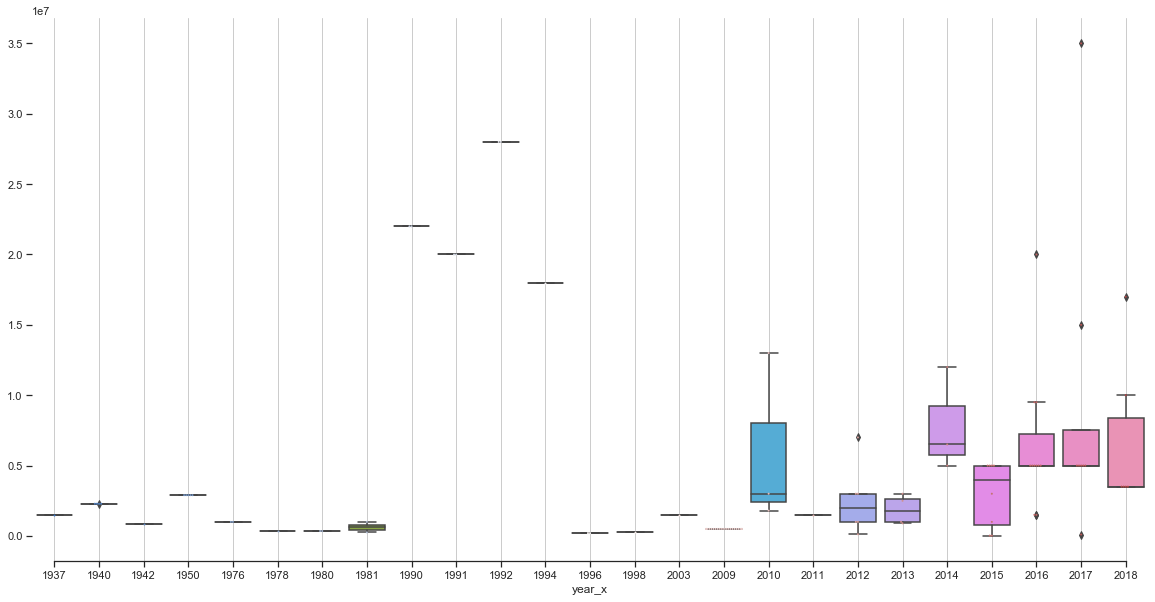

In [520]:
sns.set(style='ticks')

f, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(x= 'year_x', y = 'production_budget', data = top_100_ROI)

sns.swarmplot(x= 'year_x', y = 'production_budget', data = top_100_ROI,
             size=2, color='.3', palette='vlag')


ax.xaxis.grid(True)
sns.set_style('darkgrid')
ax.set(ylabel='')
sns.despine(trim=True, left=True)

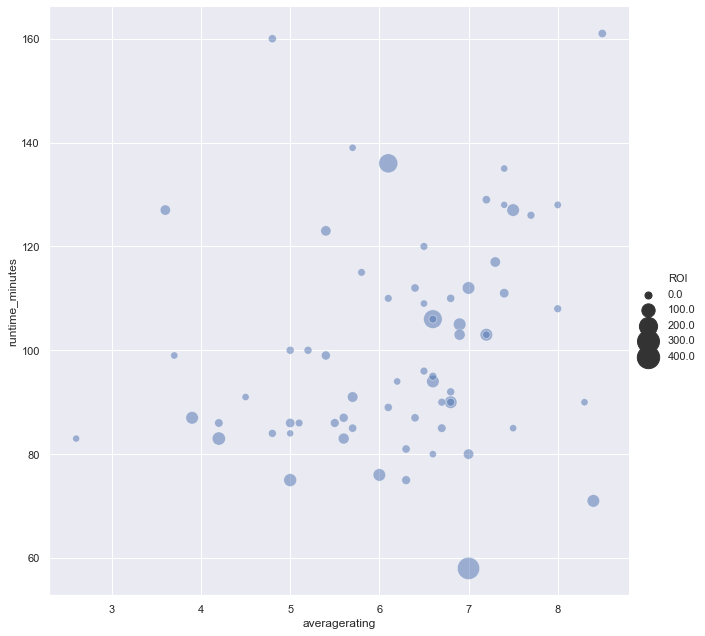

In [523]:
sns.set(style='darkgrid')
sns.relplot(x= 'averagerating', y= 'runtime_minutes', size="ROI", 
           sizes= (50, 500), alpha=.5, palette='muted', height=9, 
           data= top_100_ROI)

In [ ]:
sns.set(style='darkgrid')
sns.jointplot("averagerating", "runtime_minutes", data = )

In [457]:
top_200_rated.describe()

,domestic_gross,gross_profit_loss,id,production_budget,worldwide_adjusted,worldwide_gross,year_x,year_y,runtime_minutes,averagerating,numvotes,director
count,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.0
mean,8.723425e+07,1.721081e+08,50.205000,4.997935e+07,1.908888e+08,2.220875e+08,2012.280000,2014.125000,114.425000,7.741000,2.535826e+05,1.0
std,1.088125e+08,2.322553e+08,27.895948,6.269016e+07,2.516325e+08,2.855530e+08,6.628066,2.270496,26.947453,0.348174,2.811370e+05,0.0
min,0.000000e+00,-1.990318e+07,1.000000,1.500000e+04,-2.386295e+07,0.000000e+00,1968.000000,2010.000000,5.000000,7.300000,5.000000e+00,1.0
25%,8.161156e+06,9.543234e+06,26.750000,8.800000e+06,1.075957e+07,2.060510e+07,2012.000000,2012.000000,99.000000,7.500000,2.263925e+04,1.0
50%,4.499616e+07,6.831808e+07,49.000000,2.225000e+07,7.385927e+07,9.552464e+07,2014.000000,2014.000000,115.500000,7.700000,1.728490e+05,1.0
75%,1.258058e+08,2.234492e+08,73.000000,5.850000e+07,2.651965e+08,3.098752e+08,2016.000000,2016.000000,132.000000,8.000000,3.949500e+05,1.0
max,6.085817e+08,1.042521e+09,100.000000,2.750000e+08,1.061411e+09,1.242521e+09,2018.000000,2019.000000,180.000000,8.900000,1.841066e+06,1.0


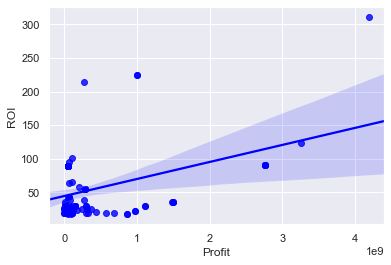

In [519]:
sns.set_style('darkgrid')
regplot = sns.regplot(x='worldwide_adjusted', y='ROI',
                      data=top_100_ROI, color='blue')
regplot.set(xlabel = 'Profit', ylabel = 'ROI')
plt.show()

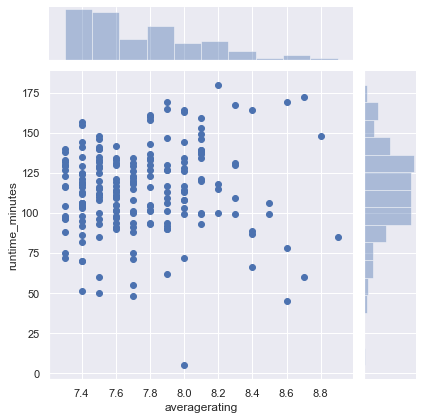

In [518]:
sns.jointplot(x='averagerating', y='runtime_minutes', kind='scatter', data= top_200_rated)

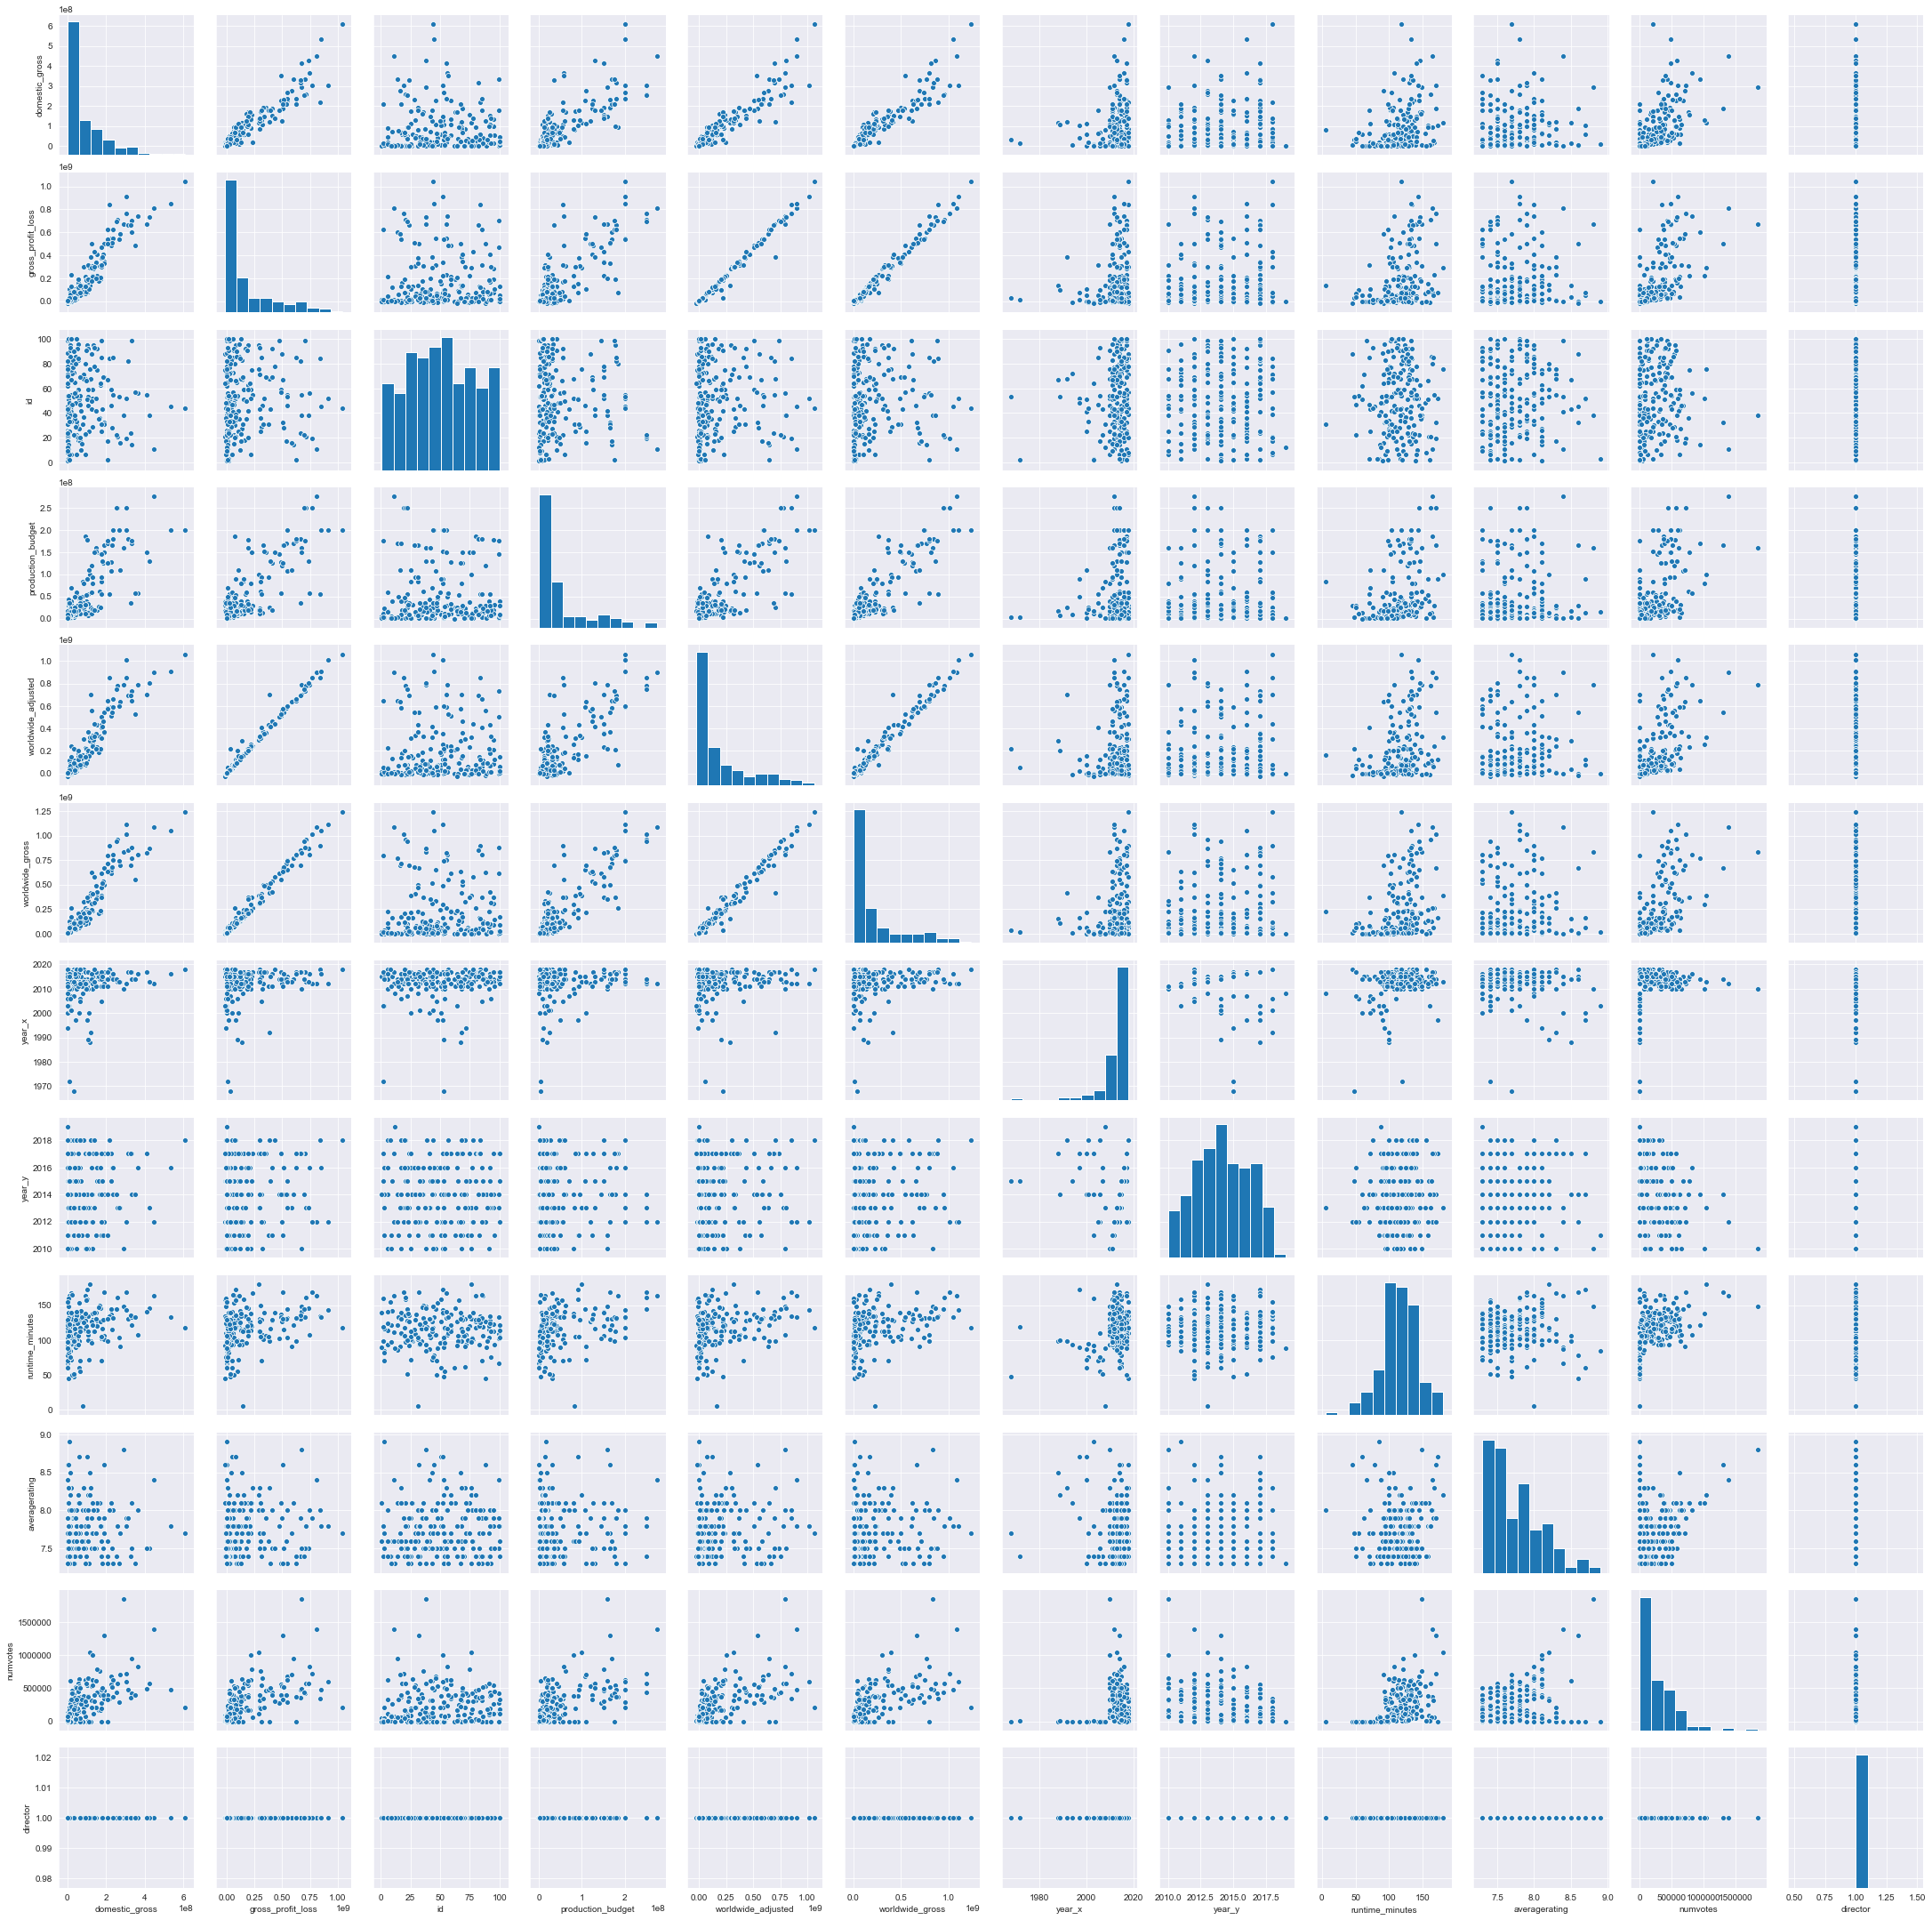

In [424]:
sns.pairplot(data= top_200_rated)

In [392]:
movie_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6853 entries, 0 to 6852
Data columns (total 21 columns):
domestic_gross        6853 non-null float64
gross_profit_loss     6853 non-null float64
id                    6853 non-null int64
movie                 6853 non-null object
production_budget     6853 non-null float64
release_date          6853 non-null datetime64[ns]
worldwide_adjusted    6773 non-null float64
worldwide_gross       6853 non-null float64
year_x                6853 non-null int64
tconst                3080 non-null object
primary_title         3080 non-null object
original_title        3080 non-null object
year_y                3080 non-null float64
runtime_minutes       2734 non-null float64
averagerating         2423 non-null float64
numvotes              2423 non-null float64
directors             3080 non-null object
primary_name          3080 non-null object
primary_profession    3080 non-null object
known_for_titles      3080 non-null object
director          

In [527]:
movie_fin_df.head()

,domestic_gross,gross_profit_loss,id,movie,production_budget,release_date,worldwide_adjusted,worldwide_gross,year_x,ROI,...,original_title,year_y,runtime_minutes,averagerating,numvotes,directors,primary_name,primary_profession,known_for_titles,director
0,102797000.0,267142000.0,47,Bambi,858000.0,1942-08-13,4.189983e+09,268000000.0,1942,311.354312,...,Bambi,2013,58.0,7.0,101.0,nm0509852,Sébastien Lifshitz,"[director, writer, actor]","[tt0156427, tt0364120, tt2668120, tt2399533]",1.0
40,117235147.0,224000000.0,11,Rocky,1000000.0,1976-11-21,1.006453e+09,225000000.0,1976,224.000000,...,Rocky,2019,NaN,6.4,5.0,nm9645626,Adnan A. Shaikh,"[director, writer, assistant_director]","[tt9430578, tt6843812]",1.0
39,117235147.0,224000000.0,11,Rocky,1000000.0,1976-11-21,1.006453e+09,225000000.0,1976,224.000000,...,Rocky,2013,136.0,6.1,46.0,nm1126847,Sujit Mondal,"[assistant_director, director, writer]","[tt0247911, tt3080284, tt4773064, tt1443519]",1.0
298,47000000.0,69675000.0,37,Halloween,325000.0,1978-10-17,2.732040e+08,70000000.0,1978,214.384615,...,Halloween,2018,106.0,6.6,88395.0,nm0337773,David Gordon Green,"[producer, director, writer]","[tt2195548, tt2382396, tt0262432, tt1502407]",1.0
1,184925486.0,183437486.0,18,Snow White and the Seven Dwarfs,1488000.0,1937-12-21,3.256741e+09,184925486.0,1937,123.277880,...,Snow White and the Seven Dwarfs,2017,49.0,NaN,NaN,nm8856734,Karthik Chandan,"[director, writer, editor]","[tt7262292, tt7266888, tt7258136, tt7262750]",1.0


In [528]:
directors_movies_grouped = movie_fin_df.groupby(['primary_name'])['ROI'].sum()

In [529]:
directors_movies_grouped

primary_name
Aaron Agrasanchez     0.654205
Aaron Alon           -0.341989
Aaron Schnobrich      0.175320
Aashiq Abu           -0.591644
Abdolreza Kahani     -0.984205
                       ...    
Zhi-yu Ma            26.179241
Zhigang Yang          0.356765
Zoran Lisinac        -0.987064
Zsófia Szilágyi       2.944579
Ömür Atay             1.106048
Name: ROI, Length: 2307, dtype: float64

In [530]:
directors_movies_grouped.sort_values(ascending=False, inplace=True)

In [531]:
directors_movies_grouped

primary_name
Sébastien Lifshitz      311.354312
David Gordon Green      240.700313
Sujit Mondal            224.000000
Adnan A. Shaikh         224.000000
Karthik Chandan         123.277880
                           ...    
Michael Winterbottom     -2.349216
David L. Hunt            -2.777767
Gurinder Chadha          -2.835706
Mario Van Peebles        -2.941985
James Gray               -2.955209
Name: ROI, Length: 2307, dtype: float64

In [526]:
directors_movies_grouped[:20]

primary_name
Sébastien Lifshitz    4.189983e+09
Kenneth Branagh       3.960293e+09
Karthik Chandan       3.256741e+09
Jeff Tudor            3.239579e+09
Brad Dalton           3.239579e+09
Kiran Nakti           3.239579e+09
Vinod Venkatesh       3.239579e+09
Ravi Punj             3.198832e+09
James Wan             2.876839e+09
Atsushi Wada          2.802024e+09
Joss Whedon           2.604298e+09
Christopher Nolan     2.599663e+09
Michael Bay           2.484265e+09
Peter Jackson         2.384830e+09
Christophe Gans       2.250978e+09
Bill Condon           2.229198e+09
Francis Lawrence      2.194689e+09
Bryan Singer          1.838113e+09
Guy Ritchie           1.734555e+09
Gareth Edwards        1.702751e+09
Name: worldwide_adjusted, dtype: float64